<center>

# Exploratory Data Analysis

</center>




we will use the real estate dataset from the [House Prices Prediction Kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview). To download the dataset, you need a Kaggle account and must join the competition.

Link to the dataset: [Kaggle Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
)

# Automated Data Profiling

There are automated tools to speed up your EDA pipeline and identify data quality issues. One such tool is [ydata-profiling](https://docs.profiling.ydata.ai/latest/) (formerly known as pandas profiling). Uncomment the code cells below to use ydata profiling for the above dataset.

In [1]:
#!pip install --quiet  ydata-profiling
#!pip install --quiet  pandas

In [2]:
#import numpy as np
#import pandas as pd
#from ydata_profiling import ProfileReport

#df = pd.read_csv(r"C:\Users\sussa\OneDrive\Desktop\Second Semester Dal\PROCESS OF DATA SCIENCE\train.csv")
#profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)

In [3]:
#profile.to_file("your_report.html")

___

## Business Understanding


**Business Problem Statement:**

**Problem:** In the real estate market, accurately determining the value of properties is challenging due to the complexity and variability of factors affecting house prices. This lack of precision in price estimation leads to difficulties in setting appropriate selling prices, negotiating sales, and understanding market trends. Real estate agents, buyers, and sellers often rely on subjective assessments or outdated information, leading to inefficient market transactions and potential financial losses.

**Solution:** To address this problem, we propose to develop an advanced predictive model using machine learning techniques. This model will analyze a wide range of property features, such as location, size, condition, and year built, to accurately estimate house sale prices. By leveraging historical data and sophisticated algorithms, the model will aim to provide a more objective and data-driven basis for price estimation.

**Impact:** The implementation of this predictive model will enable real estate agents, buyers, and sellers to make more informed decisions. It will streamline the process of setting and negotiating prices, reducing the time and resources currently spent on subjective assessments. Furthermore, the insights gained from the model will help understand market trends and dynamics, leading to more strategic and profitable real estate transactions.

Let's come up with 3 data science solutions and assess their feasibility (required data, required business capacity) and select the final solution



**SOLUTION 1:** 
Analyzing and predicting house prices primarily based on property characteristics (e.g size, condition, style/design).


**Feasibility:**

Required Data: The dataset is rich in the house property characteristics, making it highly feasible.


**Business Capacity:** Moderate. 

This approach requires capabilities in handling and analyzing structured data, feature engineering, and basic to moderate machine learning techniques.


**SOLUTION 2:**  Leveraging location characteristics (geographic location, neighborhood) to predict house prices, possibly integrating external data on proximity features.


**Feasibility:**

Required Data: The dataset contains basic location data. However, for a comprehensive analysis, additional data on proximity to amenities and economic indicators would be ideal.


**Business Capacity:** Moderate to high. 

This approach requires not only data analysis skills but also the ability to integrate and interpret external data sources.


**SOLUTION 3:** An all-rounded approach that combines property characteristics, location features, market dynamics, and additional features like amenities to predict house prices.


**Feasibility:**

Required Data: Requires a comprehensive set of data, including external market and economic indicators (i.e. external resources). Some of these aspects are not covered in the current dataset.


**Business Capacity:** High. 

This solution demands advanced data analysis skills, expertise in economic modeling, and possibly advanced machine learning or statistical modeling techniques.


**FINAL SOLUTION SELECTION:**

Considering the nature of our dataset and the scope of our business problem, we recommend Solution 1: Property-Centric Analysis because of the following reasons:

1. Our dataset is rich in property characteristics, making this approach highly feasible and directly aligned with the data we have.

2. Focusing on property characteristics allows for a more straightforward and efficient modeling process, which is beneficial given our current (business) capacity.

3. Property features are significant determinants of house prices and can provide valuable insights for real estate valuation, catering well to our objective of informing pricing and market understanding.
 

A. The prediction subject for this problem is the “Sales Price of the House” denoted by the column name **“SalePrice”**.


B. The domain concept we chose is **“Property Characteristics”** which has the following subconcepts:

1. House Size

- LotArea
- TotalBsmtSF 
- 1stFlrSF 
- 2ndFlrSF 
- GrLivArea 


2. House Condition
- OverallQual
- OverallCond 
- YearBuilt
- YearRemodAdd 


3. House Design
- HouseStyle
- RoofStyle
- Exterior1st 
- Exterior2nd 
- MasVnrType 


4. House Amenities
- PoolArea
- GarageArea
- OpenPorchSF
- EnclosedPorch
- WoodDeckSF

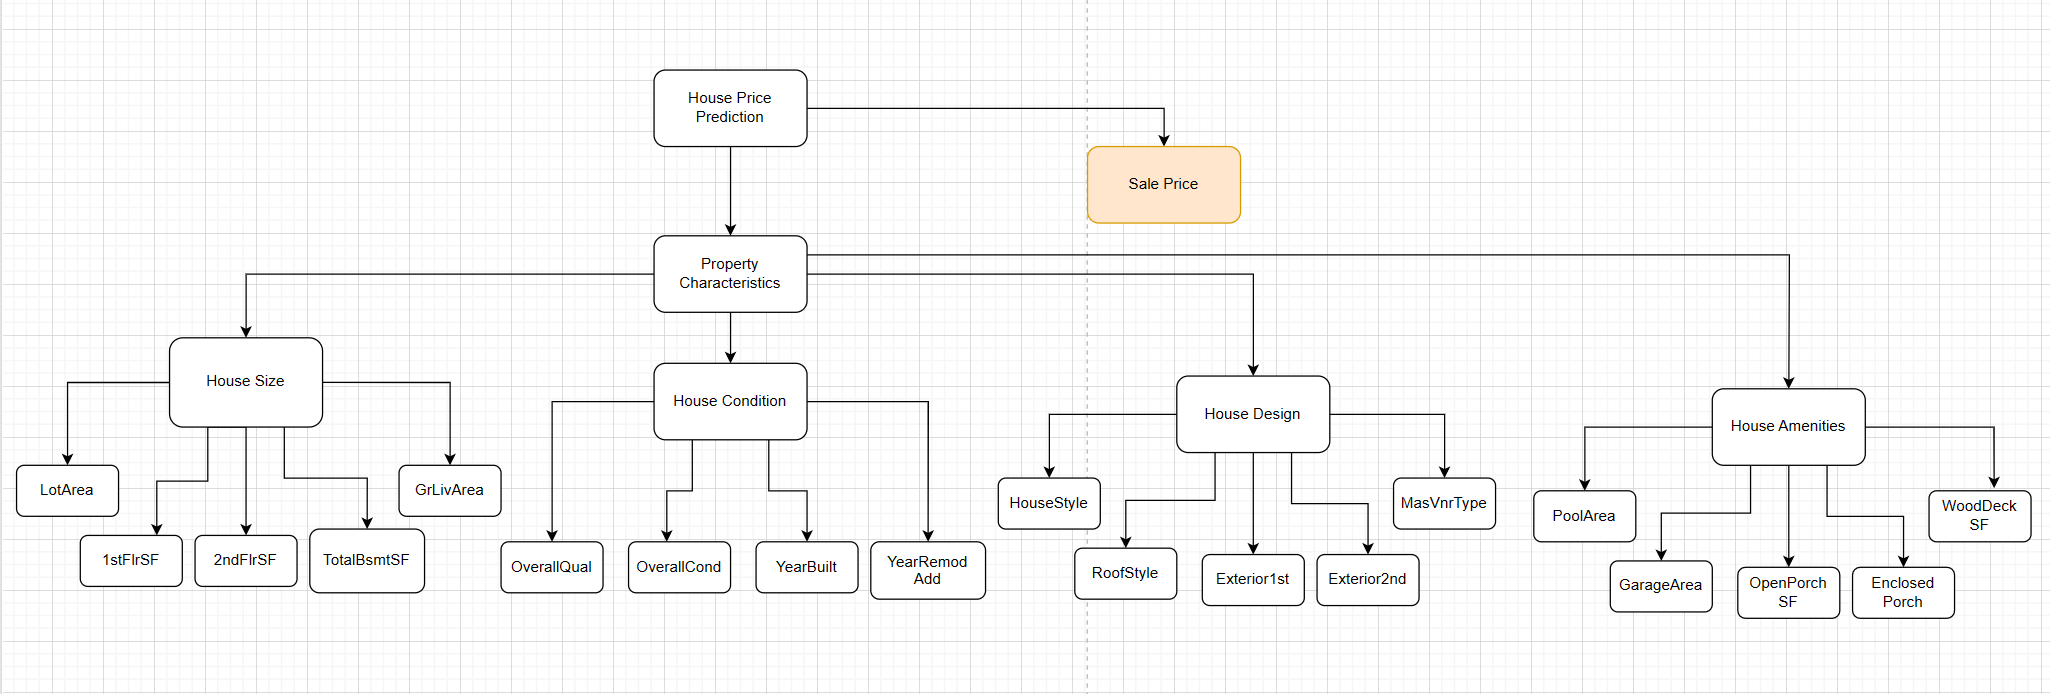

Link: http://tinyurl.com/flowchartss

In [4]:
# Creating the Analytics Base Table (ABT)
import pandas as pd
import warnings

# set options to avoid truncation of data when displaying data frame
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
# set floating point numbers to show upto 2 decimals
pd.set_option('display.float_format','{:.2f}'.format)

# Load the dataset to pandas data frame
df = pd.read_csv("train.csv")
 
# Before performing data exploration let's choose the best descriptive features
abt= df[["Id","LotArea","1stFlrSF","2ndFlrSF","TotalBsmtSF","GrLivArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","PoolArea","GarageArea","OpenPorchSF","EnclosedPorch","WoodDeckSF","SalePrice"]]

In [5]:
# Summary of ABT

import pandas as pd

# Define the ABT data
abt_data = {
    "Feature Name": [
        "LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", 
        "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", 
        "HouseStyle", "RoofStyle", "Exterior1st", "Exterior2nd", "MasVnrType", 
        "PoolArea", "GarageArea", "OpenPorchSF", "EnclosedPorch", "WoodDeckSF"
    ],
    "Domain Concept": [
        "House Size", "House Size", "House Size", "House Size", "House Size",
        "House Condition", "House Condition", "House Condition", "House Condition",
        "House Design", "House Design", "House Design", "House Design", "House Design",
        "House Amenities", "House Amenities", "House Amenities", "House Amenities", "House Amenities"
    ],
    "Feature Description": [
        "Size of the lot in square feet", "Total square feet of basement area", "First Floor square feet", "Second Floor square feet", "Above grade living area square feet",
        "Rates the overall material and finish of the house", "Rates the overall condition of the house", "Original construction date", "Remodel date",
        "Style of dwelling", "Type of roof", "Exterior covering on house", "Exterior covering on house if more than one material", "Masonry veneer type",
        "Pool area in square feet", "Size of garage in square feet", "Open porch area in square feet", "Enclosed porch area in square feet", "Wood deck area in square feet"
    ],
    "Feature Type": [
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous",
        "Continuous", "Continuous", "Continuous", "Continuous",
        "Categorical", "Categorical", "Categorical", "Categorical", "Categorical",
        "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"
    ],
    "Data Type": [
        "Float", "Float", "Float", "Float", "Float",
        "Integer", "Integer", "Integer", "Integer",
        "String", "String", "String", "String", "String",
        "Float",  "Float",  "Float",  "Float",  "Float"
    ]
}

# Creating the DataFrame
abt_summary = pd.DataFrame(abt_data)

abt_summary



,Feature Name,Domain Concept,Feature Description,Feature Type,Data Type
0,LotArea,House Size,Size of the lot in square feet,Continuous,Float
1,TotalBsmtSF,House Size,Total square feet of basement area,Continuous,Float
2,1stFlrSF,House Size,First Floor square feet,Continuous,Float
3,2ndFlrSF,House Size,Second Floor square feet,Continuous,Float
4,GrLivArea,House Size,Above grade living area square feet,Continuous,Float
5,OverallQual,House Condition,Rates the overall material and finish of the h...,Continuous,Integer
6,OverallCond,House Condition,Rates the overall condition of the house,Continuous,Integer
7,YearBuilt,House Condition,Original construction date,Continuous,Integer
8,YearRemodAdd,House Condition,Remodel date,Continuous,Integer
9,HouseStyle,House Design,Style of dwelling,Categorical,String


## Q2.	[0.3] **Data Exploration**
1.	Build the data quality report of the resulting ABT.



In [6]:
# Importing warnings module and re-running the function for continuous feature report
import warnings

# Re-defining the function to build a report for continuous features
def continuous_features_report(data_df):
    # Stats we wish to calculate
    stats = {
        "Count": len, #count of items
        "Miss %": lambda df: df.isna().sum() / len(df) * 100, #percentage of missing values
        "Card.": lambda df: df.nunique(), #cardinal values
        "Min": lambda df: df.min(), #minimum value
        "1st Qrt.": lambda df: df.quantile(0.25), #1st quartile value
        "Mean": lambda df: df.mean(), #mean value
        "Median": lambda df: df.median(), #median value
        "3rd Qrt": lambda df: df.quantile(0.75), #3rd quartile value
        "Max": lambda df: df.max(), #max value
        "Std. Dev.": lambda df: df.std(), #standard deviation
    }
    
    # Select the columns with numerical datatypes
    continuous_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[continuous_feat_names]

    # Initialize report DataFrame
    report_df = pd.DataFrame(index=continuous_feat_names, columns=stats.keys())

    # Calculate stats for each feature
    for stat_name, fn in stats.items():
        # Ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = continuous_data_df.apply(fn)

    return report_df

# Generating the report for continuous features in the ABT
continuous_report = continuous_features_report(abt)
continuous_report


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Id,1460,0.00,1460,1,365.75,730.50,730.50,1095.25,1460,421.61
LotArea,1460,0.00,1073,1300,7553.50,10516.83,9478.50,11601.50,215245,9981.26
1stFlrSF,1460,0.00,753,334,882.00,1162.63,1087.00,1391.25,4692,386.59
2ndFlrSF,1460,0.00,417,0,0.00,346.99,0.00,728.00,2065,436.53
TotalBsmtSF,1460,0.00,721,0,795.75,1057.43,991.50,1298.25,6110,438.71
GrLivArea,1460,0.00,861,334,1129.50,1515.46,1464.00,1776.75,5642,525.48
OverallQual,1460,0.00,10,1,5.00,6.10,6.00,7.00,10,1.38
OverallCond,1460,0.00,9,1,5.00,5.58,5.00,6.00,9,1.11
YearBuilt,1460,0.00,112,1872,1954.00,1971.27,1973.00,2000.00,2010,30.20
YearRemodAdd,1460,0.00,61,1950,1967.00,1984.87,1994.00,2004.00,2010,20.65


In [7]:
# Correcting the function to build a report for categorical features
def categorical_features_report(data_df):
    # Define the statistics to calculate
    def _mode(df):
        return df.mode().iloc[0]

    def _mode_freq(df):
        mode_val = _mode(df)
        return (df == mode_val).sum()

    def _second_mode(df):
        mode_val = _mode(df)
        second_mode_series = df[df != mode_val].mode()
        return second_mode_series.iloc[0] if not second_mode_series.empty else None

    def _second_mode_freq(df):
        second_mode_val = _second_mode(df)
        return (df == second_mode_val).sum() if second_mode_val is not None else 0

    stats = {
        "Count": len,  # count of items
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,  # percentage of missing values
        "Card.": lambda df: df.nunique(),  # cardinal values
        "Mode": _mode,  # mode
        "Mode Freq": _mode_freq,  # mode frequency
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,  # percentage of mode values in dataset
        "2nd Mode": _second_mode,  # second mode
        "2nd Mode Freq": _second_mode_freq,  # second mode frequency
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,  # percentage of second mode values in dataset
    }

    # Select the columns with non-numerical datatypes
    categorical_feat_names = data_df.select_dtypes(exclude="number").columns
    categorical_data_df = data_df[categorical_feat_names]

    # Initialize report DataFrame
    report_df = pd.DataFrame(index=categorical_feat_names, columns=stats.keys())

    # Calculate stats for each feature
    for stat_name, fn in stats.items():
        # Ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(categorical_data_df)

    return report_df

# Generating the report for categorical features in the ABT
categorical_report = categorical_features_report(abt)
categorical_report


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
HouseStyle,1460,0.00,8,1Story,726,49.73,2Story,445,30.48
RoofStyle,1460,0.00,6,Gable,1141,78.15,Hip,286,19.59
Exterior1st,1460,0.00,15,VinylSd,515,35.27,HdBoard,222,15.21
Exterior2nd,1460,0.00,16,VinylSd,504,34.52,MetalSd,214,14.66
MasVnrType,1460,0.55,4,None,864,59.18,BrkFace,445,30.48


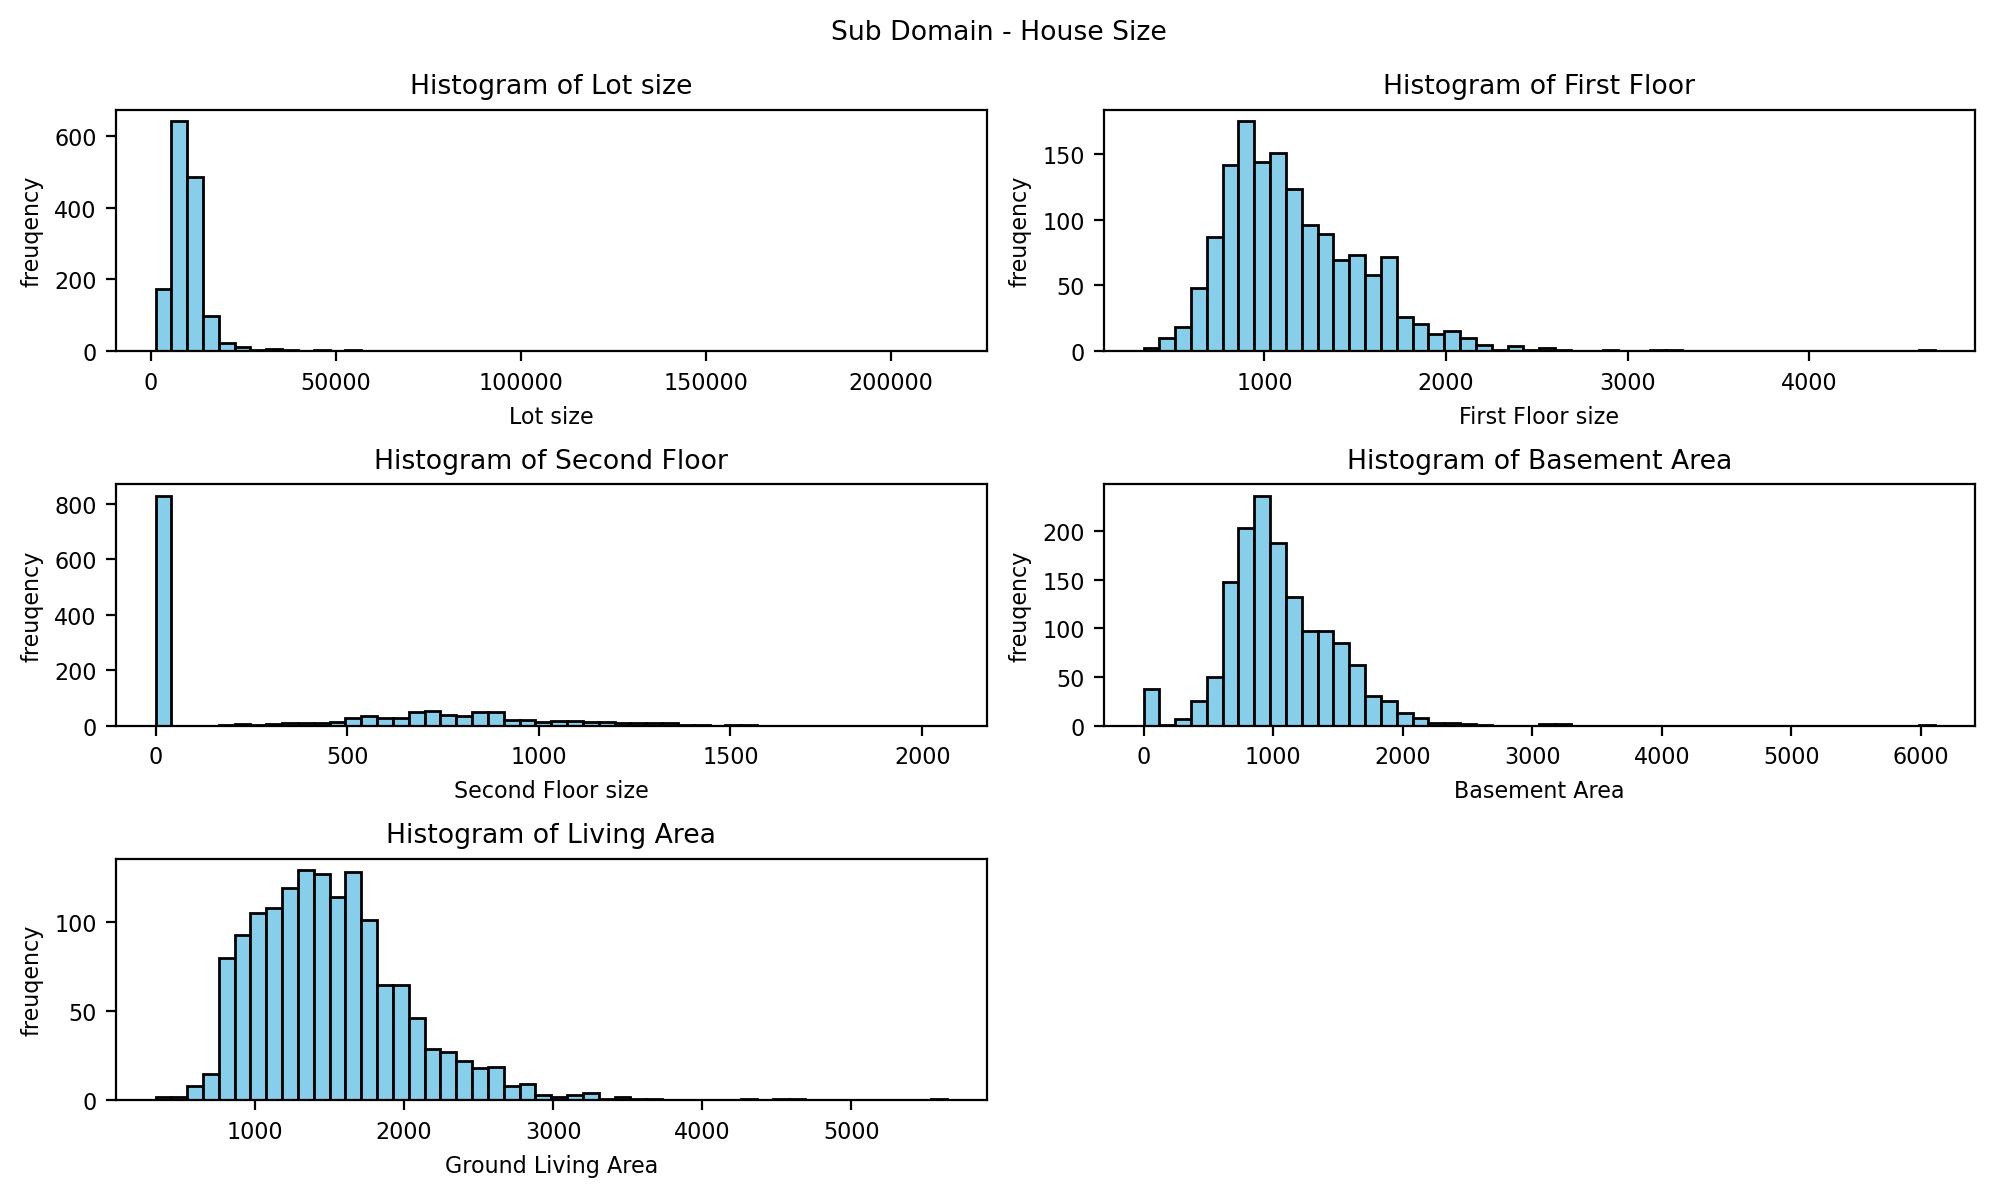

In [8]:
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 8

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# Plot the histograms on subplot with labels and title
# For LotArea
plt.subplot(3,2,1)
plt.hist(abt['LotArea'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Lot size')
plt.ylabel('freuqency')
plt.title('Histogram of Lot size')

#------------------------------------------------------------------------

# For First Floor Size
plt.subplot(3,2,2)
plt.hist(abt['1stFlrSF'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('First Floor size')
plt.ylabel('freuqency')
plt.title('Histogram of First Floor')

#------------------------------------------------------------------------

# For Second Floor Size
plt.subplot(3,2,3)
plt.hist(abt['2ndFlrSF'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Second Floor size')
plt.ylabel('freuqency')
plt.title('Histogram of Second Floor')

#------------------------------------------------------------------------

# For Basement Area
plt.subplot(3,2,4)
plt.hist(abt['TotalBsmtSF'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Basement Area')
plt.ylabel('freuqency')
plt.title('Histogram of Basement Area')

#------------------------------------------------------------------------

# For Ground Living Area
plt.subplot(3,2,5)
plt.hist(abt['GrLivArea'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Ground Living Area')
plt.ylabel('freuqency')
plt.title('Histogram of Living Area')

# Show the plot
plt.suptitle("Sub Domain - House Size")
plt.tight_layout()
plt.show()

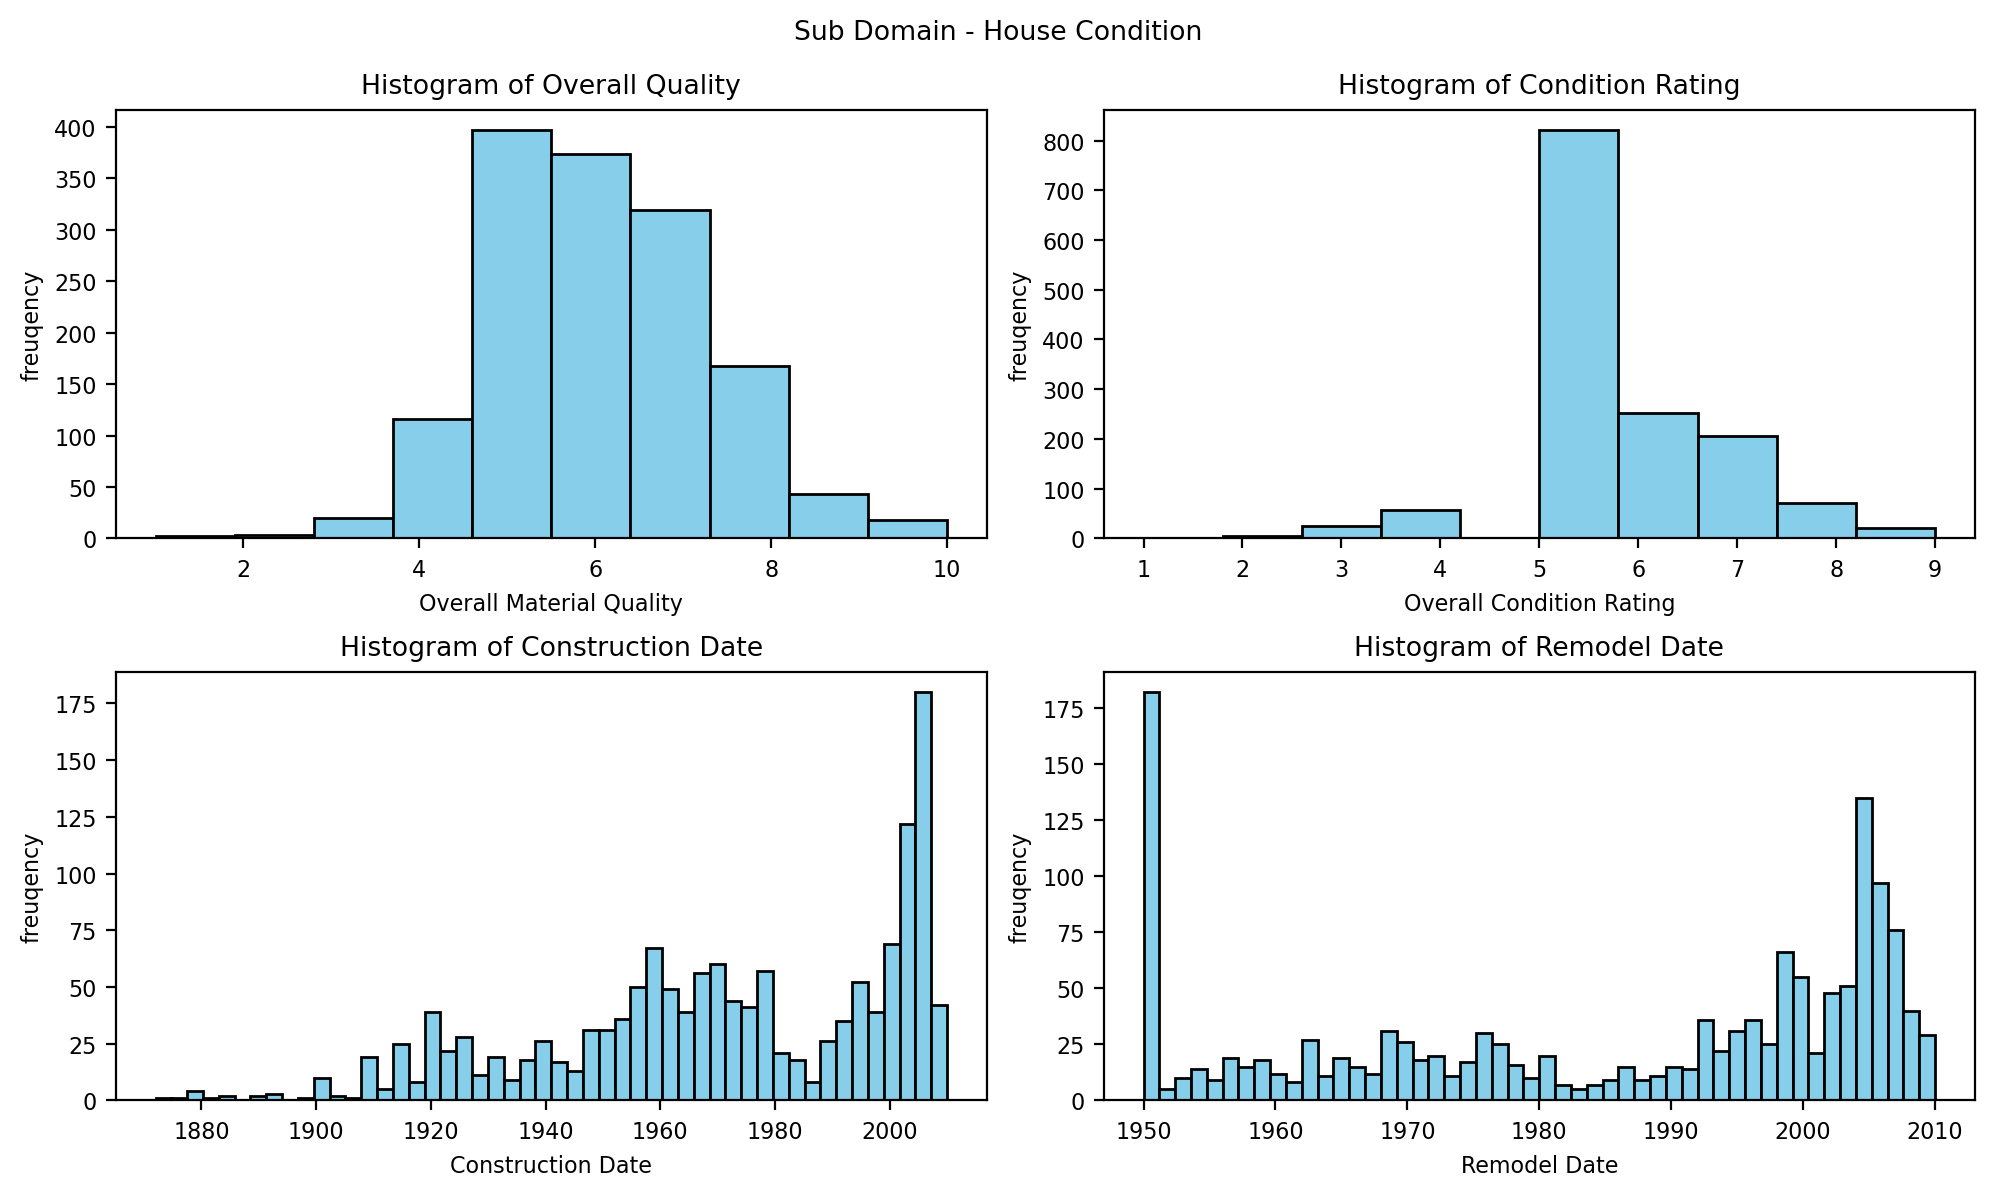

In [9]:
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 8

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# Plot the histogram on subplots with labels and title
# For Material Quality
plt.subplot(2,2,1)
plt.hist(abt['OverallQual'],bins=10, color='skyblue', edgecolor='black');
plt.xlabel('Overall Material Quality')
plt.ylabel('freuqency')
plt.title('Histogram of Overall Quality')

#------------------------------------------------------------------------

# For Condition Rating
plt.subplot(2,2,2)
plt.hist(abt['OverallCond'],bins=10, color='skyblue', edgecolor='black');
plt.xlabel('Overall Condition Rating')
plt.ylabel('freuqency')
plt.title('Histogram of Condition Rating')

#------------------------------------------------------------------------

# For Construction Date
plt.subplot(2,2,3)
plt.hist(abt['YearBuilt'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Construction Date')
plt.ylabel('freuqency')
plt.title('Histogram of Construction Date')

#------------------------------------------------------------------------

# For Remodel Date
plt.subplot(2,2,4)
plt.hist(abt['YearRemodAdd'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Remodel Date')
plt.ylabel('freuqency')
plt.title('Histogram of Remodel Date')


# Show the plot
plt.suptitle("Sub Domain - House Condition")
plt.tight_layout()
plt.show()

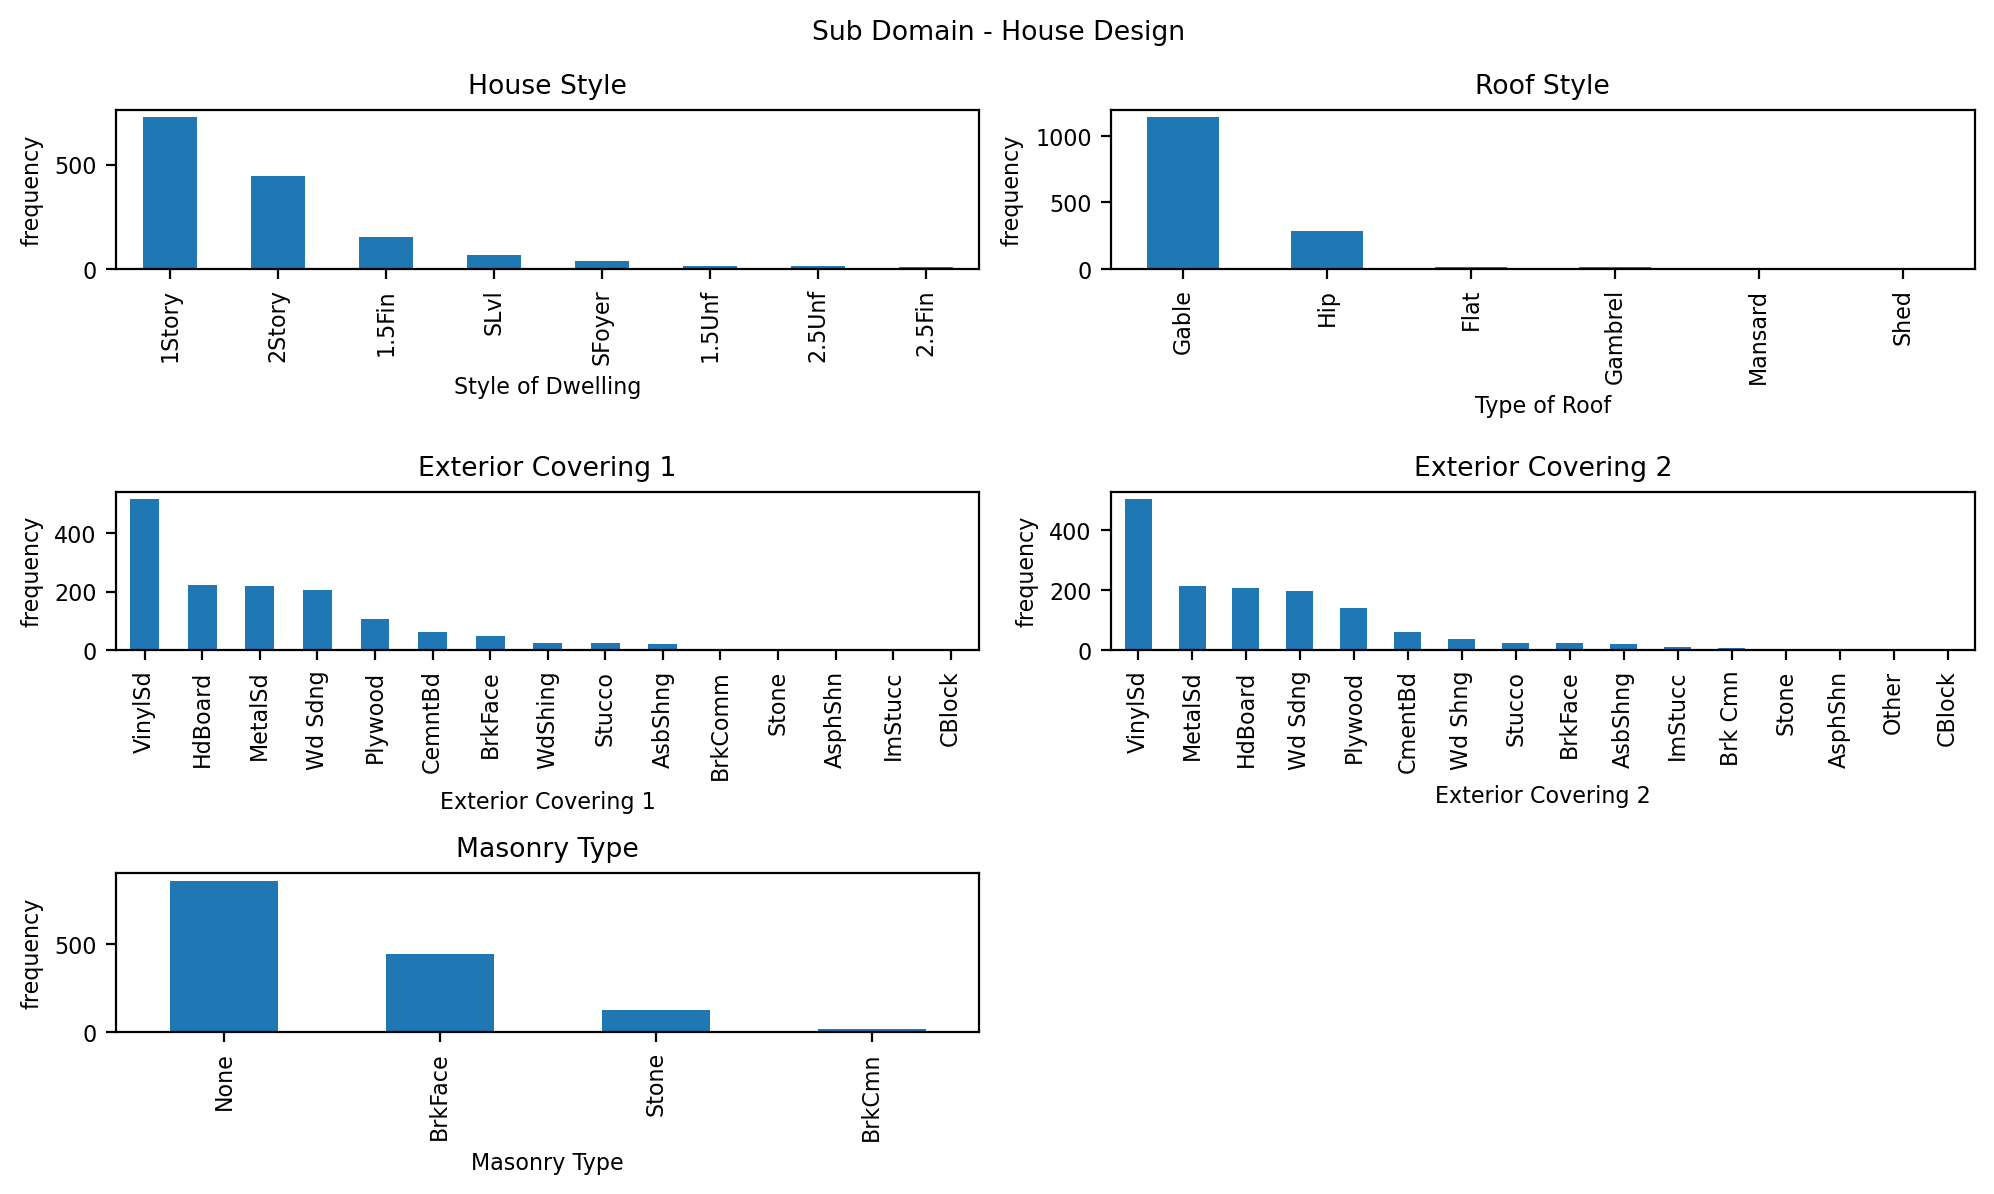

In [10]:
from matplotlib import pyplot as plt

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 8

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'


# Plot the histogram on subplots with labels and title
# For House Style
plt.subplot(3,2,1)
abt['HouseStyle'].value_counts().plot.bar();
plt.xlabel('Style of Dwelling')
plt.ylabel('frequency')
plt.title('House Style')

#------------------------------------------------------------------------

# For Roof Style
plt.subplot(3,2,2)
abt['RoofStyle'].value_counts().plot.bar();
plt.xlabel('Type of Roof')
plt.ylabel('frequency')
plt.title('Roof Style')

#------------------------------------------------------------------------

# For Exterior 1st
plt.subplot(3,2,3)
abt['Exterior1st'].value_counts().plot.bar();
plt.xlabel('Exterior Covering 1')
plt.ylabel('frequency')
plt.title('Exterior Covering 1')

#------------------------------------------------------------------------

# For Exterior 2
plt.subplot(3,2,4)
abt['Exterior2nd'].value_counts().plot.bar();
plt.xlabel('Exterior Covering 2')
plt.ylabel('frequency')
plt.title('Exterior Covering 2')

#------------------------------------------------------------------------

# For Masonry Veneer Type
plt.subplot(3,2,5)
abt['MasVnrType'].value_counts().plot.bar();
plt.xlabel('Masonry Type')
plt.ylabel('frequency')
plt.title('Masonry Type')


# Show the plot
plt.suptitle("Sub Domain - House Design")
plt.tight_layout()
plt.show()

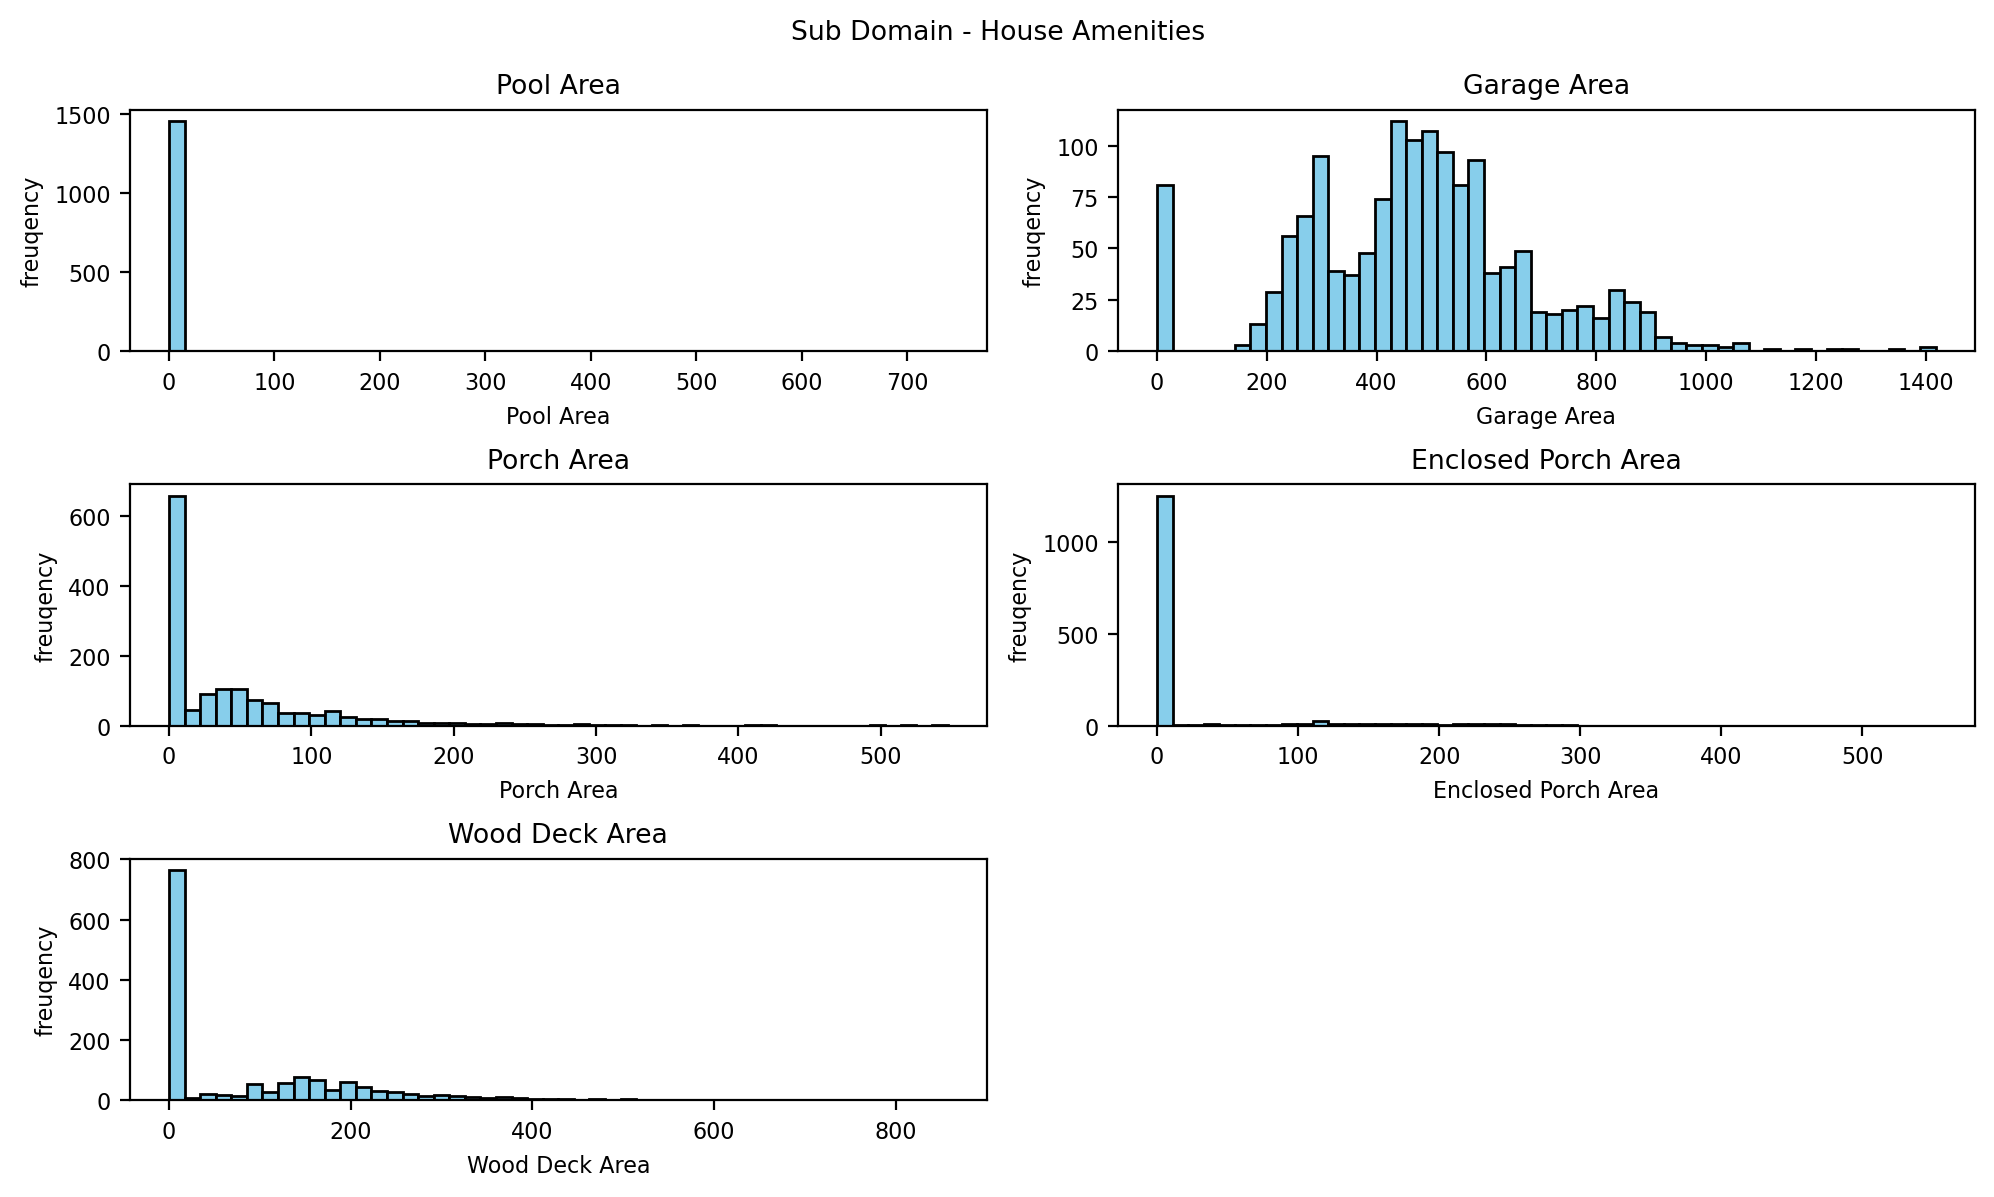

In [11]:
from matplotlib import pyplot as plt
 
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["font.size"] = 8
 
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'
 
 
# Plot the histogram on subplots with labels and title
# For Pool Area
plt.subplot(3,2,1)
plt.hist(abt['PoolArea'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Pool Area')
plt.ylabel('freuqency')
plt.title('Pool Area')
 
#------------------------------------------------------------------------
 
# For Garage Area
plt.subplot(3,2,2)
plt.hist(abt['GarageArea'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Garage Area')
plt.ylabel('freuqency')
plt.title('Garage Area')
 
#------------------------------------------------------------------------
 
# For Porch Area
plt.subplot(3,2,3)
plt.hist(abt['OpenPorchSF'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Porch Area')
plt.ylabel('freuqency')
plt.title('Porch Area')
 
#------------------------------------------------------------------------
 
# For Enclosed Porch Area
plt.subplot(3,2,4)
plt.hist(abt['EnclosedPorch'],bins=50, color='skyblue', edgecolor='black');
plt.xlabel('Enclosed Porch Area')
plt.ylabel('freuqency')
plt.title('Enclosed Porch Area')
 
#------------------------------------------------------------------------
 
# For Wood Deck Area
plt.subplot(3,2,5)
plt.hist(abt['WoodDeckSF'],bins=50, color='skyblue', edgecolor='black');plt.xlabel('Wood Deck Area')
plt.ylabel('freuqency')
plt.title('Wood Deck Area')
 
 
# Show the plot
plt.suptitle("Sub Domain - House Amenities")
plt.tight_layout()
plt.show()

2.	Identify data quality issues and build the data quality plan.

**DATA QUALITY ISSUES**

**1. Outliers:** 
Based on the visualizations created based on our data quality report, we detected some potential outliers present in several features, by looking for data points that fell significantly outside the interquartile range (IQR). For example:
**LotArea** has a maximum value (215245) that is significantly higher than the 3rd quartile (11601.50), indicating potential outliers. Other features we detected with potential outliers were: **2ndFlrSF**, **BasementArea**, **GroundLivingArea**, **PoolArea**, **GarageArea**,  

**2. Skewed Distribution:**
Some features have a skewed distribution. For instance:
**2ndFlrSF**, **PoolArea**, **OpenPorchSF**, and **EnclosedPorch** have a minimum value of 0, which indicates a large number of properties without these features, leading to a right-skewed distribution.

**3. Irregular Cardinality:**
Some continous features like **OverallQual**, **OverallCond**,**PoolArea**, **EnclosedPorch**, **YearBuilt** and **YearRemodAdd** have relatively low cardinality. Some categorical features such as **Exterior1st** and **Exterior2nd** have higher cardinality (15 and 16 unique values, respectively).

**4. Missing Values:**
There is a significant percentage of missing values (approximately 59.73%) in the **MasVnrType** feature. This requires attention, as such a high percentage of missing data can significantly impact the predictive modeling.

**DATA QUALITY PLAN**

To address these issues, we reccommend the following actions:

1. We will apply statistical methods to identify and treat the outliers, such as capping, transformation, or removal after careful analysis.

2. We will normalize the features with skewed distribution by applying transformation or feature engineering. We will convert some skewed numeric features to binary.

3. Continuous features with irregular cardinality will be treated as categorical if appropriate. We will also combine rare categories in high-cardinality categorical features to reduce complexity.

4. We investigate why values are missing for this feature, then will omit the feature with missing values if it is not critical and is too extensive to impute. We will also consider imputing it with appropriate statistical measures if it is an important feature.


## Q3.	[0.2] **Data Preparation**



1.	Preprocess your data according to the data quality plan.


In [12]:
# Handling null values
# "MasVnrType" has missing values of 59.73%
# Let's drop the column
abt = abt.drop('MasVnrType',axis=1)

In [13]:
# Handling irregular cardinality
 
# irregular cardinality in continuous features

# too low cardinality is identified in - "YearBuilt","YearRemodAdd",OverallQual", "OverallCond","PoolArea","EnclosedPorch"
# let's drop these columns too
abt = abt.drop(columns=['Id','YearBuilt','YearRemodAdd','OverallQual','OverallCond','PoolArea','EnclosedPorch'])

<Axes: >

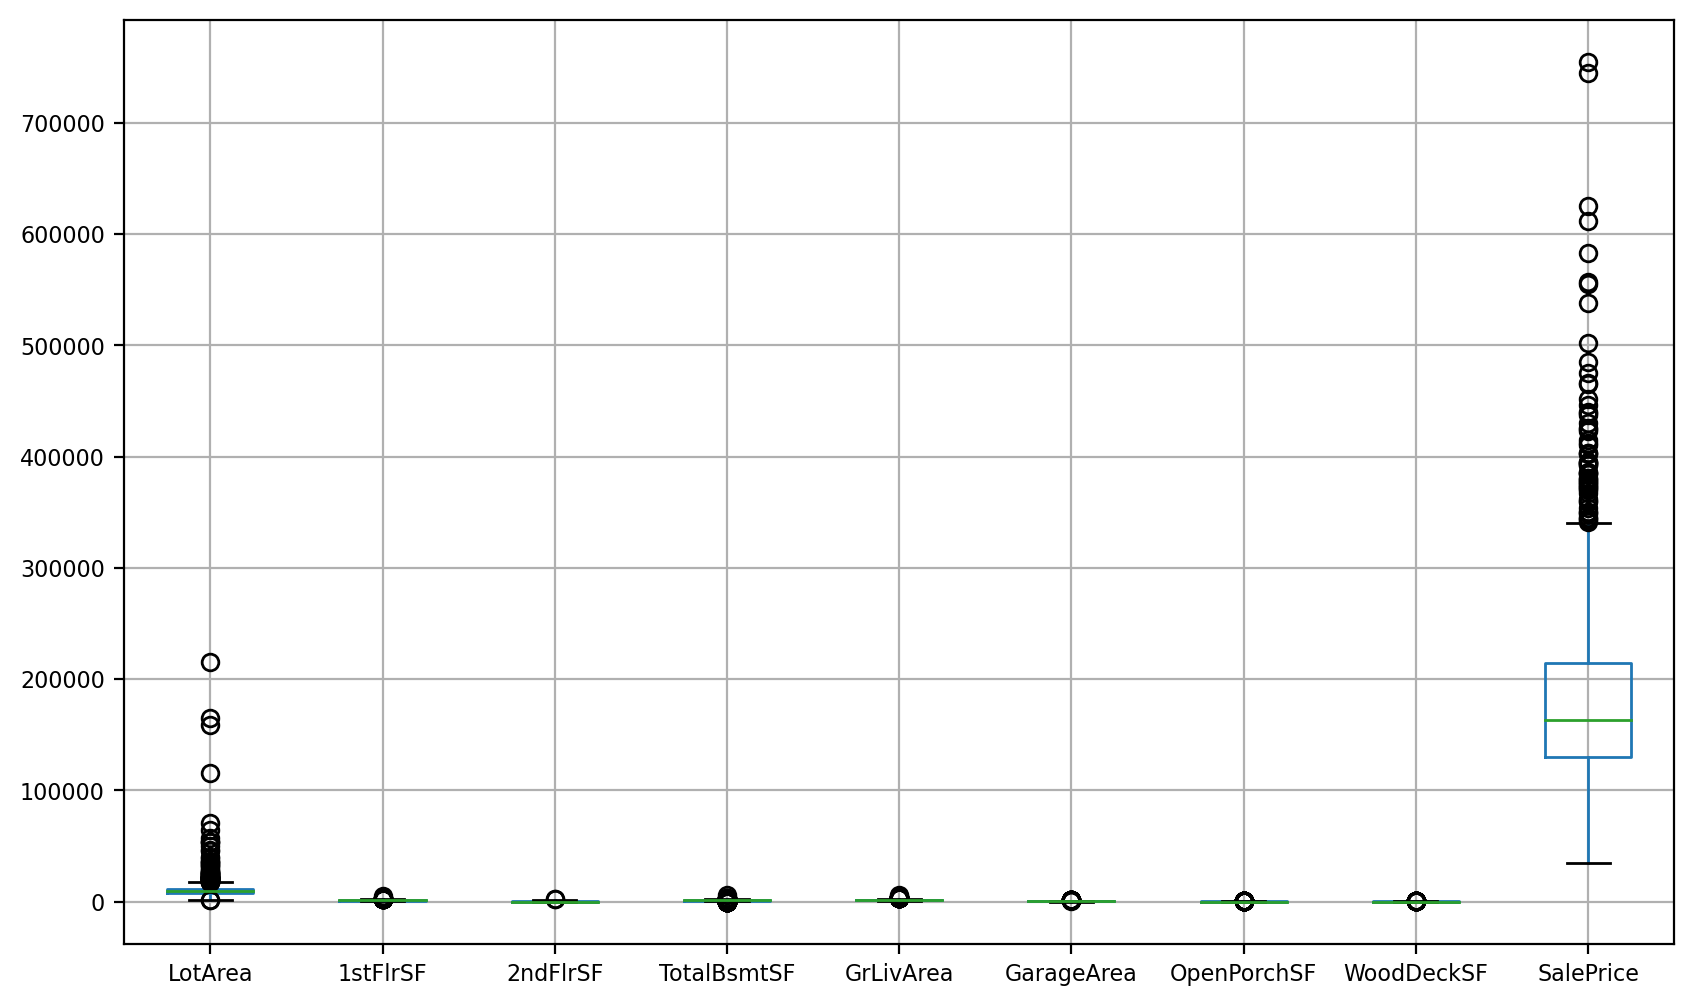

In [14]:
# ABT boxplot
abt.boxplot()

In [15]:
# Handling Outliers
 
# outliers for OpenPorchSF
Q1 = abt['OpenPorchSF'].quantile(0.25)
Q3 = abt['OpenPorchSF'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
 
outliers_OpenPorchSF = abt[(abt['OpenPorchSF'] < (Q1 - 0.8 * IQR)) | (abt['OpenPorchSF'] > (Q3 + 0.8 * IQR))]
print("number of outliers: ",len(outliers_OpenPorchSF))

number of outliers:  163


<Axes: >

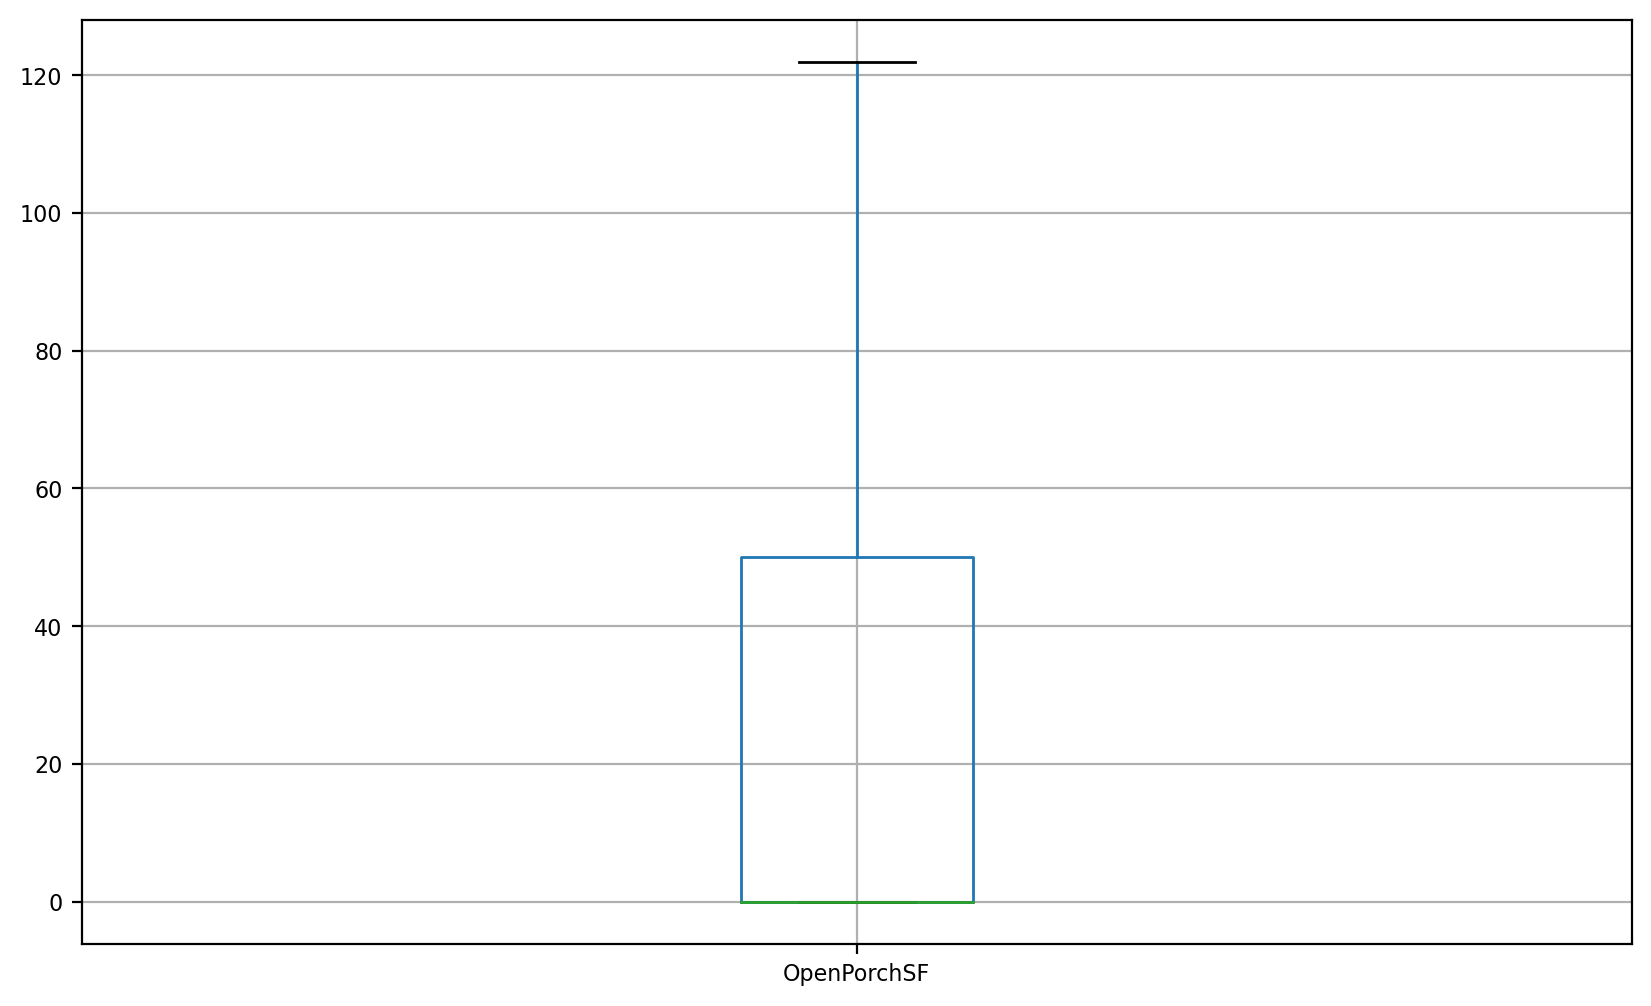

In [16]:
abt = abt.drop(outliers_OpenPorchSF.index)
abt.boxplot('OpenPorchSF')

In [17]:
# outliers for GarageArea
Q1 = abt['GarageArea'].quantile(0.25)
Q3 = abt['GarageArea'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
 
outliers_GarageArea = abt[(abt['GarageArea'] < (Q1 - 1.5 * IQR)) | (abt['GarageArea'] > (Q3 + 1.5 * IQR))]
print("number of outliers: ",len(outliers_GarageArea))

number of outliers:  10


<Axes: >

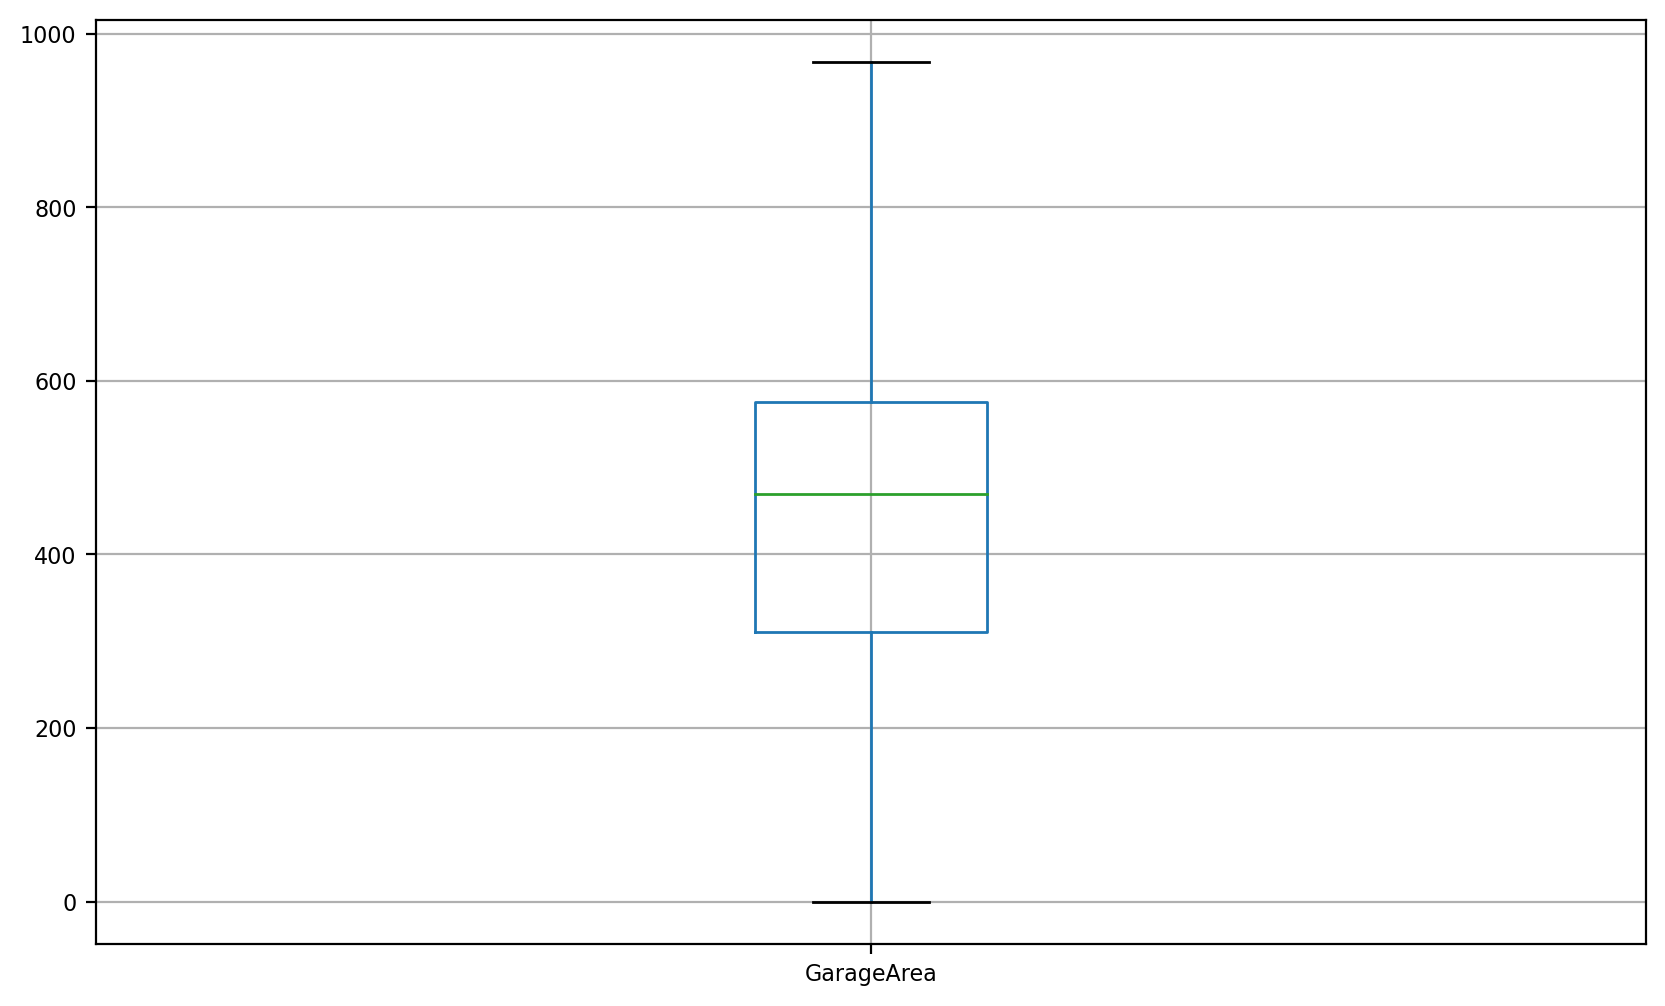

In [18]:
abt = abt.drop(outliers_GarageArea.index)
abt.boxplot('GarageArea')

In [19]:
# outliers for WoodDeckSF
Q1 = abt['WoodDeckSF'].quantile(0.25)
Q3 = abt['WoodDeckSF'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
 
outliers_WoodDeckSF = abt[(abt['WoodDeckSF'] < (Q1 - 1 * IQR)) | (abt['WoodDeckSF'] > (Q3 + 1 * IQR))]
print("number of outliers: ",len(outliers_WoodDeckSF))

number of outliers:  64


<Axes: >

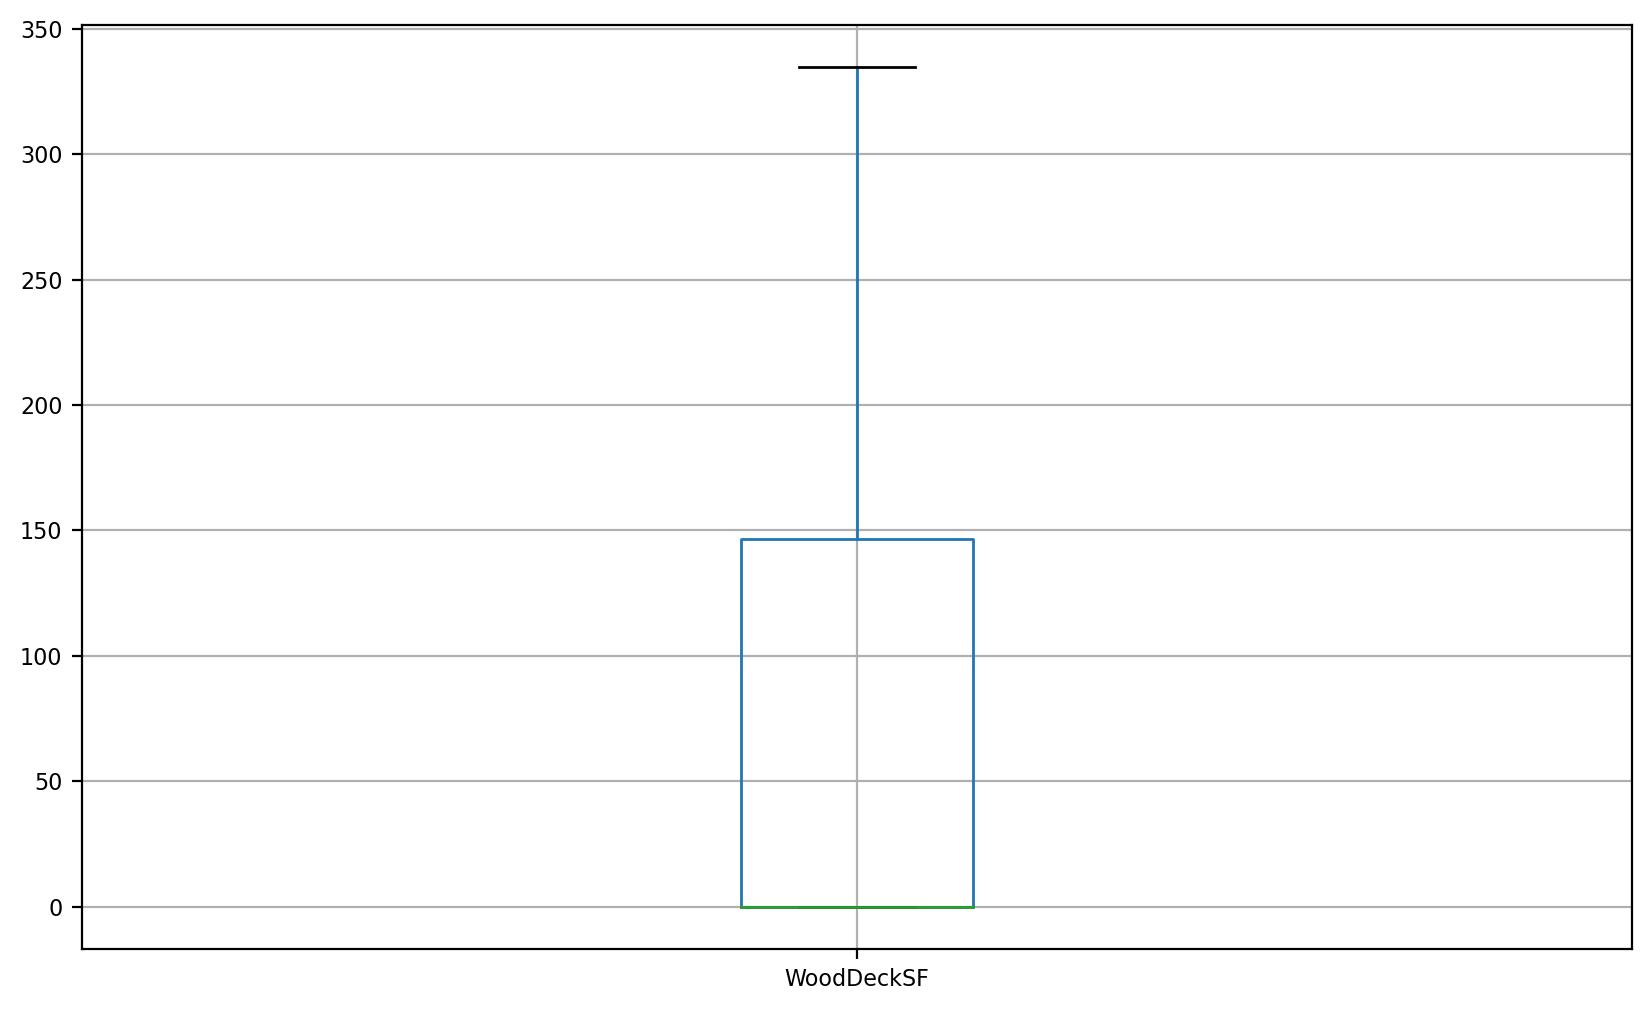

In [20]:
abt = abt.drop(outliers_WoodDeckSF.index)
abt.boxplot('WoodDeckSF')

In [21]:
# outliers for 2ndFlrSF
Q1 = abt['2ndFlrSF'].quantile(0.25)
Q3 = abt['2ndFlrSF'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
 
outliers_2ndFlrSF = abt[(abt['2ndFlrSF'] < (Q1 - 1.5 * IQR)) | (abt['2ndFlrSF'] > (Q3 + 1.5 * IQR))]
print("number of outliers: ",len(outliers_2ndFlrSF))

number of outliers:  2


<Axes: >

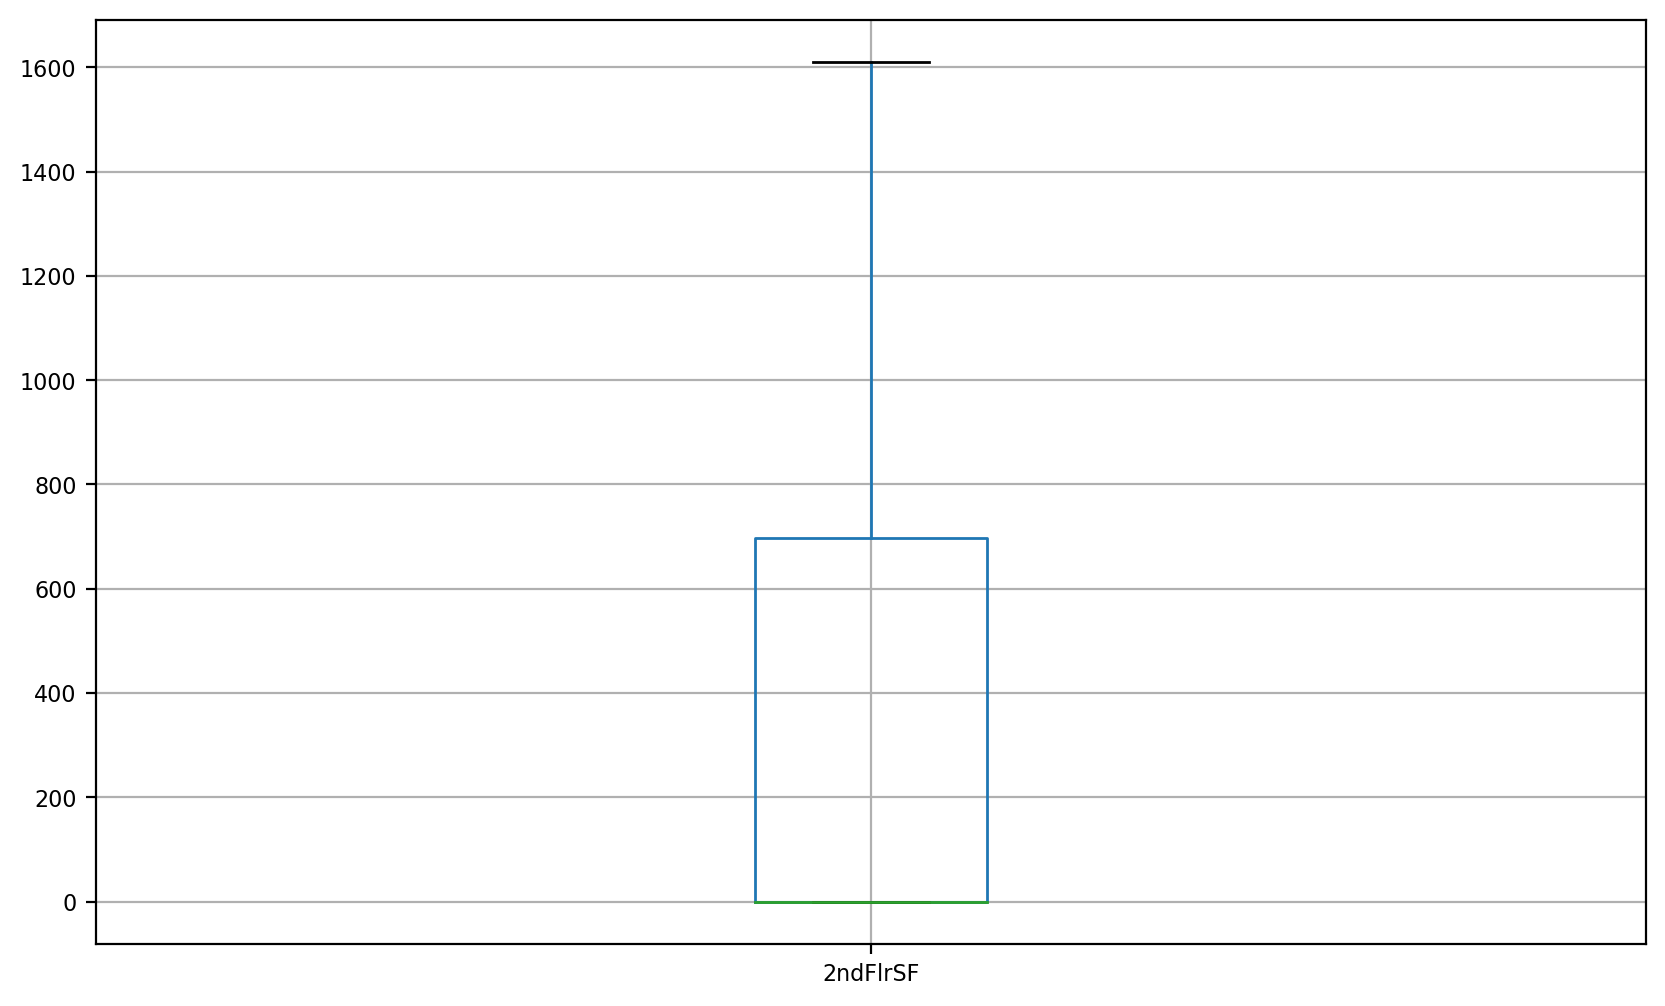

In [22]:
abt = abt.drop(outliers_2ndFlrSF.index)
abt.boxplot('2ndFlrSF')

In [23]:
# outliers for LotArea
Q1 = abt['LotArea'].quantile(0.25)
Q3 = abt['LotArea'].quantile(0.75)
# Interquartile Range
IQR = Q3-Q1
 
outliers_LotArea = abt[(abt['LotArea'] < (Q1 - 1.2 * IQR)) | (abt['LotArea'] > (Q3 + 1.2 * IQR))]
print("number of outliers: ",len(outliers_LotArea))

number of outliers:  103


<Axes: >

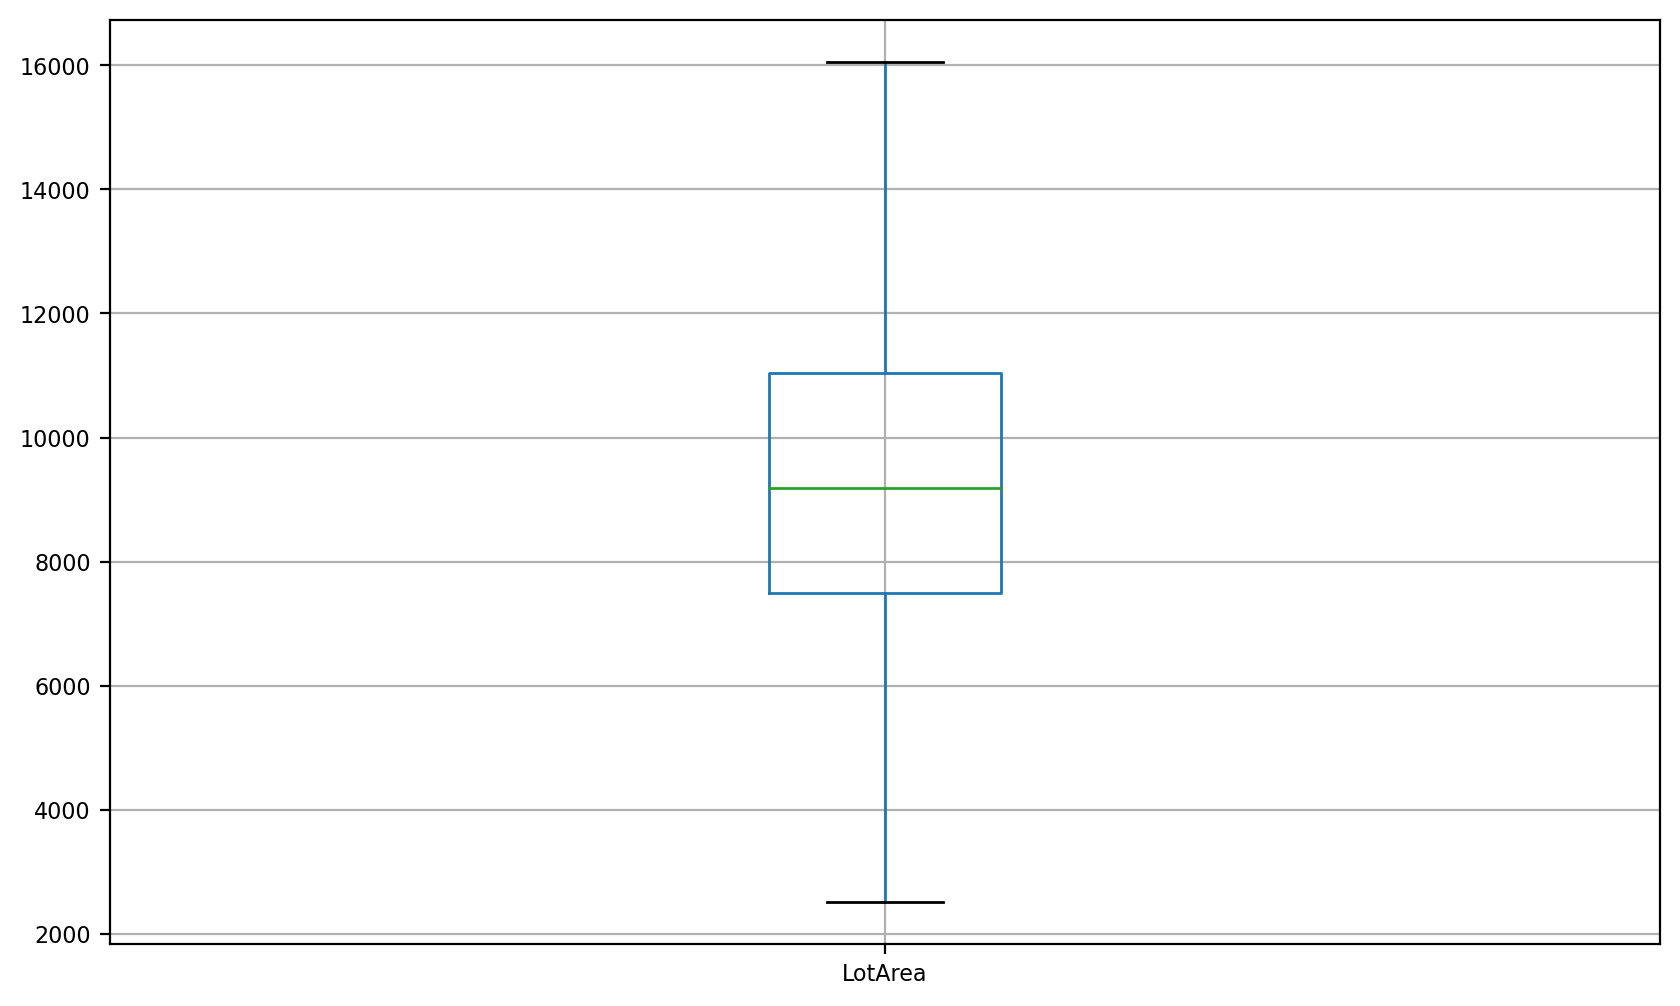

In [24]:
abt = abt.drop(outliers_LotArea.index)
abt.boxplot('LotArea')

## Data Insights

In [25]:
correlation_matrix = abt.corr(numeric_only=True)
correlation_matrix

,LotArea,1stFlrSF,2ndFlrSF,TotalBsmtSF,GrLivArea,GarageArea,OpenPorchSF,WoodDeckSF,SalePrice
LotArea,1.00,0.34,0.15,0.27,0.40,0.29,0.15,0.13,0.39
1stFlrSF,0.34,1.00,-0.28,0.78,0.50,0.45,0.23,0.21,0.61
2ndFlrSF,0.15,-0.28,1.00,-0.25,0.68,0.09,0.20,0.05,0.26
TotalBsmtSF,0.27,0.78,-0.25,1.00,0.37,0.45,0.26,0.22,0.64
GrLivArea,0.40,0.50,0.68,0.37,1.00,0.41,0.35,0.20,0.69
GarageArea,0.29,0.45,0.09,0.45,0.41,1.00,0.31,0.23,0.61
OpenPorchSF,0.15,0.23,0.20,0.26,0.35,0.31,1.00,0.15,0.43
WoodDeckSF,0.13,0.21,0.05,0.22,0.20,0.23,0.15,1.00,0.34
SalePrice,0.39,0.61,0.26,0.64,0.69,0.61,0.43,0.34,1.00


In [ ]:
import seaborn as sns
# plotting the heatmap
heat_map = sns.heatmap(data=correlation_matrix,
                annot=True)

# displaying the plotted heatmap
plt.show()

**What are the descriptive features that highly correlate with the target feature?**

From the correlation matrix, LotArea and 1st Floor surface area are the features that highly correlate with the target feature(Sales Price). Bigger plots usually result in higher sales price because of the potential for more development. Large plots provides private space from neighbours which are relatively scarce in urban locations, hence it increases the value.

Typically it's the same case for 1st Floor surface area, since bigger living spaces increases the home value as the usually incorporate living rooms, kitchen, office and many more.



**What are the domain concepts that highly correlate with each other?**

The relation between Total Basement Area(TotalBsmtSF) and First Floor Area(1stFlrSF) has highest correlation of 0.78. Possible explanation is the size of basement and first floor have direct relationships in terms of layout and design. Another reason can be that basements are usually used as storage spaces and the size allocated to basement is usually same as the first floor.



**Are there any features that are useless for the predictive model?**

Second Floor Area(2ndFlrSF) - 0.26 and Wood Deck Area(WoodDeckSF) - 0.34 with Sales Price seems to have less priority for this model. Possible reasons can be even though these features increase aesthetic appeal to the house, other features like living area, garage area significally impact the sales price. Another possible reason can be biased dataset and these features don't have enough predictive powers.



**Business Insights**

From the insights of correlation matrix and heat map, we can suggest that bigger lot areas and first floor surface areas tend to command higher sales prices for spacious living environments and private outdoor spaces. Sellers may need to weigh the costs and benefits of incorporating the features which are less correlated considering market prices or economy as these features have less predictive power in determining property value.